# ANN: Artificial Neural Networks

- ANNs are inspired by biological neurons found in cerebral cortex of our brain.

- The cerebral cortex (plural cortices), also known as the cerebral mantle, is the outer layer of neural tissue of the cerebrum of the brain in humans and other mammals.

![neuron_image](https://user-images.githubusercontent.com/115534733/234502592-3c8ea082-ea3f-475a-a437-87a2d1d2cf72.jpg)

In the above diagram we can neurons of human brains, these neurons resemble the ANN.

![brain_image](https://user-images.githubusercontent.com/115534733/234519779-a1de0230-bec8-4d74-98fd-b29da702b7e2.jpg)

The largest and most important part of the human brain is the cerebral cortex. Although it cannot be observed directly, various regions within the cortex are responsible for different functions, as shown in the diagram. The cortex plays a crucial role in important cognitive processes such as memory, attention, perception, thinking, language, and awareness.


### Biological Neuron

![single_neuron](https://user-images.githubusercontent.com/115534733/234521312-8b1ead11-cec6-4595-b3e9-acdb56dabe52.jpg)

- Biological Neuron produce short electrical impulses known as action potentials which travels through axons to the synapses which releases chemical signals i.e neurotransmitters.

- When a connected neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires ( or does not fires, think of a NOT gate here) its own action potential or electrical impulse.

- These simple units form a strong network known as Biological Neural Network (BNN) to perform very complex computation task.

- Similar to the Biological neuron we have artificial neuron which can be used to perform complex computation task.


### The first artificial neuron

* It was in year 1943, Artificial neuron was introduced by-
    * Neurophysiologist Warren McCulloh and
    * Mathematician Walter Pitts
    
* They have published their work in `McCulloch, W.S., Pitts, W. A logical calculus of the ideas immanent in nervous activity. Bulletin of Mathematical Biophysics 5, 115–133 (1943). https://doi.org/10.1007/BF02478259`. read full paper at [this link](https://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf)

* They have shown that these simple neurons can perform small logical operation like OR, NOT, AND gate etc.

* Following figure represents these ANs which can perform (a) Buffer, (b) OR, (c) AND and (d) A-B operation

    [image source](https://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf)

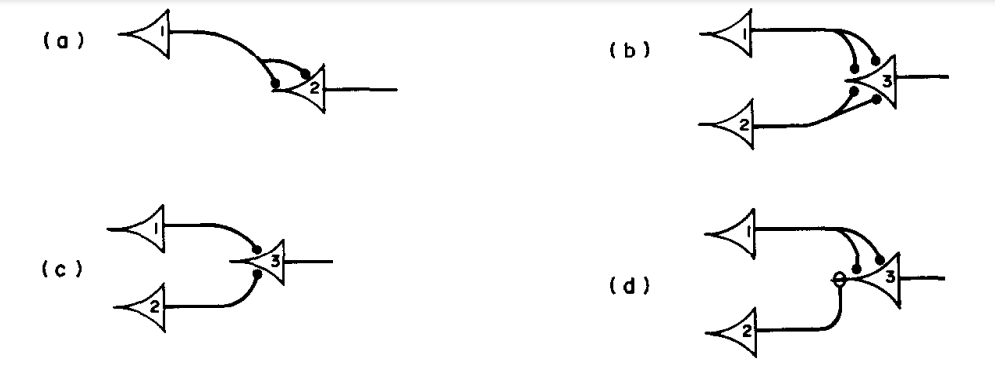

* These neuron only fires when they get two active inputs.

## The Perceptron

* Its the simplest ANN architecture. It was invented by Frank Rosenblatt in 1957 and published as `Rosenblatt, Frank (1958), The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain, Cornell Aeronautical Laboratory, Psychological Review, v65, No. 6, pp. 386–408. doi:10.1037/h0042519`
* It has different architecture then the first neuron that we have seen above. Its known as threshold logic unit(TLU) or linear threshold unit (LTU).
* Here inputs are not just binary.
* Lets see the architecture shown below -
    
    <a title="Chrislb / CC BY-SA (http://creativecommons.org/licenses/by-sa/3.0/)" href="https://commons.wikimedia.org/wiki/File:ArtificialNeuronModel_english.png"><img width="1024" alt="ArtificialNeuronModel english" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/ArtificialNeuronModel_english.png/1024px-ArtificialNeuronModel_english.png"></a>

* Common activation functions used for Perceptrons are (with threshold at 0)-

$$step(z)\ or\ heaviside(z) = \left\{\begin{matrix}
0 & z<0\\
1 & z\geq 0
\end{matrix}\right.$$

- In the further tutorials we will study more about activation functions, for now we can understand **activation functions** are mathematical equations that are applied to the output of a neural network node, in order to introduce non-linearity into the output. These functions help the neural network to learn and model complex patterns in the data. Activation functions are a key component of artificial neural networks and are used to determine the output of each neuron based on the input it receives. There are many types of activation functions, including **sigmoid, ReLU, tanh, and softmax**, each with their own unique properties and use cases.

---
## Implementation of Perceptron with Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd

In [3]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta # learning rate
    self.epochs = epochs #iterations

  def activationFunction(self, inputs, weights):
    z = np.dot(inputs, weights)
    return np.where(z > 0 , 1, 0)

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
    print(f"X_with_bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)

# AND Operation:

In [4]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
X = AND.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [6]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [7]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [-1.16513685e-04  5.38153778e-06  8.48893189e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[ 0.49988349  0.50000538 -0.49991511]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-1.16513685e-04  5.38153778e-06  1.00008489e+00]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.49988349 0.50000538 0.50008489]
#############

for epoch: 3
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.49988349 0.50000538 0.50008489]
#############

for epoch: 4
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.49988349 0.50000538 0.50008489]
#############

for epoc

In [8]:
model.predict(X)

array([0, 0, 0, 1])

In [9]:
model.weights

array([0.49988349, 0.50000538, 0.50008489])

---
# OR Operation:

In [10]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [11]:
X = OR.drop("y", axis=1)
X


,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [12]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [13]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [ 3.27844220e-05  7.63054057e-05 -1.20066550e-04]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[3.27844220e-05 7.63054057e-05 4.99879933e-01]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights: 
[ 1.00003278  1.00007631 -1.00012007]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.00003278  1.00007631 -0.50012007]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.00003278e+00  1.00007631e+00 -1.20066550e-04]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.00003278 1.00007631 0.49987993]
########

---
# XOR Operation:

In [14]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [15]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping across column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [16]:
y = XOR['y']
y.to_frame()


,y
0,0
1,1
2,1
3,0


In [19]:
model = Perceptron(eta = 0.5, epochs=100)
model.fit(X,y)

self.weights: [ 7.26320266e-05 -7.19635793e-05 -5.04391872e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 0 1 1]
error: 
0   -1
1    1
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-4.99927368e-01 -7.19635793e-05  4.99949561e-01]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 7.26320266e-05  4.99928036e-01 -5.00050439e-01]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-4.99927368e-01 -7.19635793e-05  4.99949561e-01]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 7.26320266e-05  4.99928036e-01 -5.00050439e-01]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-4.99927368e-01

# Conclusion:
Here we can see Perceptron can only classify the linear problem like AND, OR operation because they were linear problem. But in the case of XOR it couldn't classify correctly because it was a non-linear problem. Lets see graphically.